
#IMPORTING LIBRARIES

In [ ]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: te

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
print(tf.__version__)
from tensorflow import keras
print(keras.__version__)

2.9.0
2.9.0


#DATA CURATION AND PROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Endoscopy/labelled_images1.1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31484.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31485.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31486.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31487.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31489.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31490.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31491.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31492.jpg  
  inflating: labelled_images1.1/Training Data/Normal clean mucosa Train/fc32def0e7194981_31494.jpg  
  inflating: labelled_images1.1/Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15, #allows the images to be randomly rotated by a maximum of 15 degrees.
    zoom_range=0.2,   #randomly zooms the images by up to 20%.
    width_shift_range=0.1,  #randomly shifts the images horizontally by up to 10% of the image width.
    height_shift_range=0.1  #randomly shifts the images vertically by up to 10% of the image height.

)
test_datagen= image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
image_size = (256, 256)
batch_size = 32

# Create an ImageDataGenerator and specify the preprocessing steps
datagen = ImageDataGenerator(rescale=1./255)

# Create the training dataset generator
train_generator = train_dir.flow_from_directory('/content/labelled_images1.1/Training Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/labelled_images1.1/Test Data', #enter the location for the test dataset
     target_size = image_size,
     batch_size = batch_size,
     class_mode = 'categorical')

Found 37783 images belonging to 14 classes.
Found 9455 images belonging to 14 classes.


#MODEL CREATION

In [ ]:
from tensorflow.keras import regularizers
from keras.regularizers import l2
base_model = tf.keras.applications.EfficientNetB4(weights='imagenet', input_shape=(256,256,3), include_top=False) #EfficientNetB5, InceptionV3, ResNet101, DenseNet121, Xception
for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(14, activation='softmax'))
model.summary()

71686520/71686520 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 8, 8, 1792)       17673823  
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               918016    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 14)                3598      
                                                                 
Total params: 18,726,765
Trainable params: 18,601,558
Non

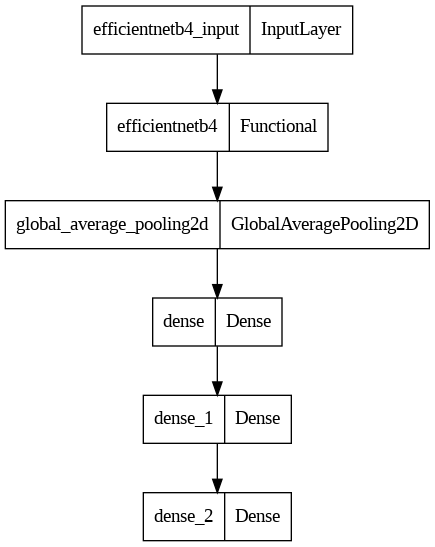

In [ ]:
from keras.utils import plot_model
plot_model(model)

MODEL COMPILATION

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
from sklearn.utils import compute_class_weight
cls=compute_class_weight('balanced',classes=sorted(np.unique(train_generator.labels)),y=train_generator.labels)

In [ ]:
class_weights = dict(zip(np.unique(train_generator.labels), cls))
class_weights

{0: 337.3482142857143,
 1: 3.8943516800659657,
 2: 7.559623849539816,
 3: 299.86507936507934,
 4: 6.663668430335097,
 5: 21.084263392857142,
 6: 4.345870715435932,
 7: 0.8051270030685305,
 8: 5.693640747438216,
 9: 0.09824126221417911,
 10: 61.33603896103896,
 11: 2.204890289449113,
 12: 1.1662859612297816,
 13: 3.951370006274838}

MODEL TRAINING

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
es=ReduceLROnPlateau('val_loss',patience=2,factor=0.1)
mp=ModelCheckpoint('capsule endoscopy classification model.h5',save_best_only=True,monitor='val_accuracy')
csv=CSVLogger('effb4.csv')
history = model.fit(
    train_generator,
    epochs= 40,
    steps_per_epoch=50,
    validation_data=validation_generator,
    callbacks=[es,mp,csv],
    )

Epoch 1/40
50/50 [==============================] - 277s 5s/step - loss: 1.0296 - accuracy: 0.7487 - auc: 0.9495 - precision: 0.8325 - recall: 0.6119 - val_loss: 1.8456 - val_accuracy: 0.7263 - val_auc: 0.8511 - val_precision: 0.7263 - val_recall: 0.7263 - lr: 0.0010
Epoch 2/40
50/50 [==============================] - 238s 5s/step - loss: 0.6866 - accuracy: 0.7994 - auc: 0.9748 - precision: 0.8701 - recall: 0.7325 - val_loss: 1.4226 - val_accuracy: 0.7263 - val_auc: 0.8923 - val_precision: 0.7263 - val_recall: 0.7263 - lr: 0.0010
Epoch 3/40
50/50 [==============================] - 239s 5s/step - loss: 0.6151 - accuracy: 0.8288 - auc: 0.9783 - precision: 0.8709 - recall: 0.7713 - val_loss: 2.3627 - val_accuracy: 0.0885 - val_auc: 0.8682 - val_precision: 0.0885 - val_recall: 0.0885 - lr: 0.0010
Epoch 4/40
50/50 [==============================] - 239s 5s/step - loss: 0.6004 - accuracy: 0.8213 - auc: 0.9805 - precision: 0.8808 - recall: 0.7806 - val_loss: 1.6274 - val_accuracy: 0.7261 - va

In [ ]:
model.evaluate(train_generator)

1181/1181 [==============================] - 770s 652ms/step - loss: 0.2226 - accuracy: 0.9334 - auc: 0.9958 - precision: 0.9523 - recall: 0.9204


[0.22260117530822754,
 0.9333562850952148,
 0.9957704544067383,
 0.9523209929466248,
 0.9203609824180603]

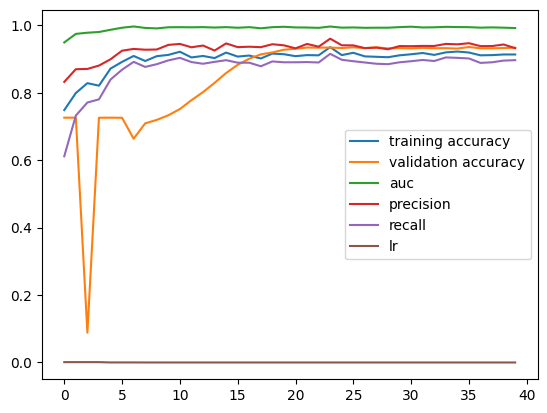

In [ ]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.plot(history.history['auc'],label='auc')
plt.plot(history.history['precision'],label='precision')
plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['lr'],label='lr')
plt.legend();

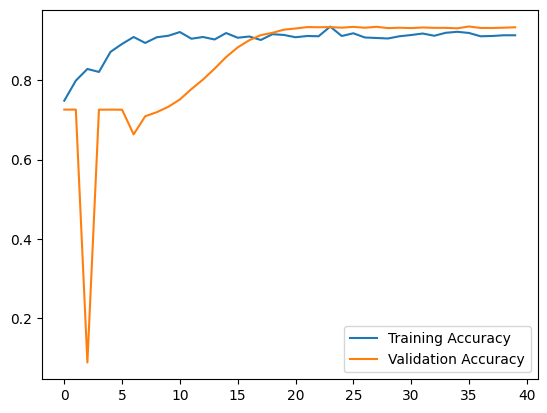

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend();

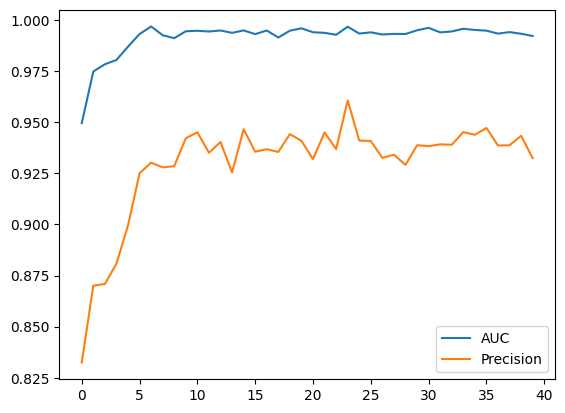

In [ ]:
plt.plot(history.history['auc'],label='AUC')
plt.plot(history.history['precision'],label='Precision')
plt.legend();

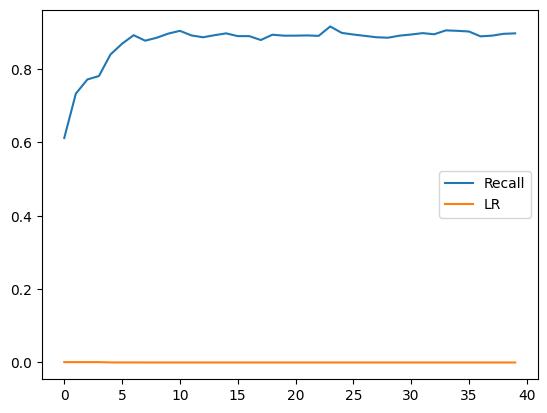

In [ ]:
plt.plot(history.history['recall'],label='Recall')
plt.plot(history.history['lr'],label='LR')
plt.legend();

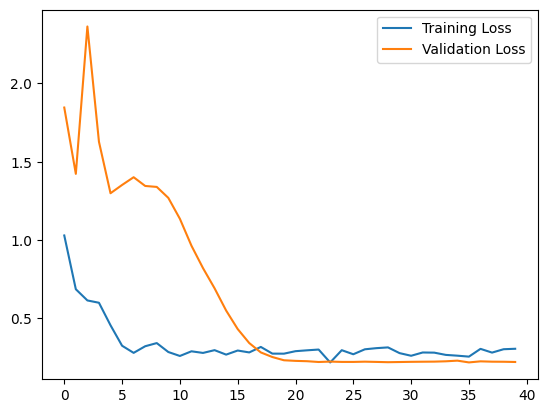

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend();

In [ ]:
model.evaluate(validation_generator)

296/296 [==============================] - 188s 637ms/step - loss: 0.2234 - accuracy: 0.9326 - auc: 0.9958 - precision: 0.9517 - recall: 0.9189


[0.22343499958515167,
 0.9326282143592834,
 0.9957758188247681,
 0.9516924023628235,
 0.9188789129257202]

In [ ]:
model.save('capsule endoscopy effb4.h5')

In [ ]:
"""
d=pd.DataFrame([history.history['loss'],history.history['accuracy'],history.history['precision'],history.history['recall'],history.history['auc'],history.history['val_loss'],history.history['val_accuracy'],history.history['val_precision'],history.history['val_recall'],history.history['val_auc']])
d=d.T
d.columns=['loss','accuracy','precision','recall','auc','val loss','val accuracy','val precision','val recall','val auc']
d
d.to_csv('effb4.csv')
"""

"\nd=pd.DataFrame([history.history['loss'],history.history['accuracy'],history.history['precision'],history.history['recall'],history.history['auc'],history.history['val_loss'],history.history['val_accuracy'],history.history['val_precision'],history.history['val_recall'],history.history['val_auc']])\nd=d.T\nd.columns=['loss','accuracy','precision','recall','auc','val loss','val accuracy','val precision','val recall','val auc']\nd\nd.to_csv('effb4.csv')\n"